In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n0 = 1.
n1 = 1.33
P = np.array([-3.,2.])
O = np.array([2.,-2.]) 

In [3]:
def GetTime(x,y,P,O,n0=1.,n1=1.):
    return n0*np.sqrt( (x-P[0])**2 + (y-P[1])**2 ) + n1*np.sqrt( (x-O[0])**2 + (y-O[1])**2 ) 

In [4]:
x = np.linspace(P[0],O[0],100)
t = GetTime(x,0.,P,O,n0,n1) 

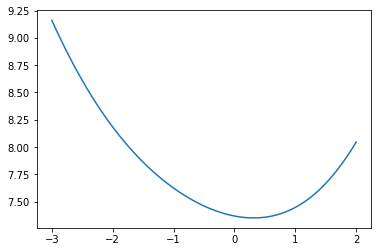

In [5]:
plt.plot(x,t)

In [6]:
index = np.where(t == np.amin(t))
x[index] # Solo una prueba

array([0.33333333])

In [7]:
def Derivative(f,x,h=1e-5):
    return (f(x+h,0,P,O,n0,n1) - f(x-h,0,P,O,n0,n1))/(2*h) 

In [8]:
def SecondDerivative(f,x,h=1e-5):
    return (f(x+h,0,P,O,n0,n1) - 2*f(x,0,P,O,n0,n1) + f(x-h,0,P,O,n0,n1))/h**2 

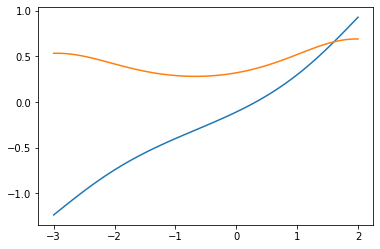

In [9]:
plt.plot(x,Derivative(GetTime,x))
plt.plot(x,SecondDerivative(GetTime,x))

In [10]:
def Newton(x,f,precision=1e-6, itmax = 100):
    
    error = 1.
    x1 = 0.
    it = 0
    
    while error >= precision and it <= itmax:
        
        step = Derivative(f,x)/SecondDerivative(f,x)
        
        x1 = x - step
        error = np.abs(step)
        
        #print(error)
        it += 1
        x = x1
    
    if it < itmax:
        print("Alcanzado en: %.0f pasos" %(it) )
    else:
        print("No alcanzado")
        
    return x1

In [11]:
xoptimo = Newton(3,GetTime)
xoptimo

Alcanzado en: 5 pasos


0.31690575706369306

In [12]:
punto = np.array([xoptimo,0.])

In [13]:
d0 = np.linalg.norm( punto - P ) # esto es pitagoras de toda la vida
d1 = np.linalg.norm( punto - O )
print(d0,d1)

3.873223954439282 2.613963701087936


In [14]:
cateto0 = (punto - P)[0]
cateto1 = (O - punto)[0]
print(cateto0,cateto1)

3.316905757063693 1.683094242936307


In [15]:
sintheta0 = cateto0/d0 

In [16]:
angle0 = np.sin(sintheta0) * 180/np.pi
angle0

43.285130024467456

In [17]:
sintheta1 = cateto1/d1
angle1 = np.sin(sintheta1) * 180/np.pi
angle1

34.39510046038327

In [18]:
# Verificamos ley de snell
sintheta0/sintheta1

1.3299999999384602

In [19]:
# pintamos

In [20]:
plotx = np.array([P,punto])
plotx

array([[-3.        ,  2.        ],
       [ 0.31690576,  0.        ]])

In [21]:
ploty = np.array([O,punto])
ploty

array([[ 2.        , -2.        ],
       [ 0.31690576,  0.        ]])

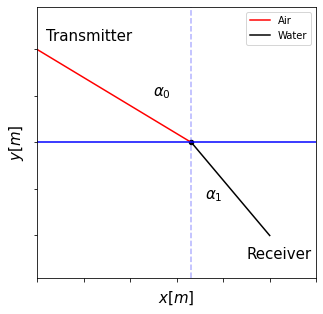

In [23]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)


ax.axis('equal')

ax.plot(plotx[:,0],plotx[:,1],color='r',label='Air')
ax.plot(ploty[:,0],ploty[:,1],color='k',label='Water')

ax.scatter(punto[0],punto[1],color='k',marker='o',s=20)

ax.axhline(y=0,color='b',alpha=1.0)
ax.axvline(x=punto[0],color='b',ls='--',alpha=0.3)


plt.text(-2.8,2.2,r'Transmitter',fontsize=15)
plt.text(1.5,-2.5,r'Receiver',fontsize=15)

plt.text(-0.5,1,r'$\alpha_{0}$',fontsize=15)
plt.text(0.6,-1.2,r'$\alpha_{1}$',fontsize=15)

ax.set_xticklabels('')
ax.set_yticklabels('')


ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel(r'$x[m]$',fontsize=15)
ax.set_ylabel(r'$y[m]$',fontsize=15)

ax.legend(loc=0)

#plt.savefig('fermat.pdf')